In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from IPython.display import display
import cv2
import skimage

#Pytorch impots
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid

# Image preprocessing

Images are of different size. Plotted the dimensions.

https://stackoverflow.com/questions/58212179/the-difference-between-opencv-and-skimage-while-reading-png-files
Image shapes are not of same dimensions. Most of them have a fourth channel corresponds to alpha channel (RGBA) 
skimages keep the alpha channel dimenions. CV2 discards them.

https://stackoverflow.com/questions/21248245/opencv-image-resize-flips-dimensions
python, OpenCV uses numpy. Numpy array shapes, functions, etc. assume (height, width) while OpenCV functions, methods, etc. use (width, height) 

Resized all the images to 224 x 224 using OpenCV. The total data size reduced to ~100 MB. 
As I used openCV, the images are stored in the BGR version of the image. However, as the images are gray scale, I don't think it would not change anything. (Luis: Could you please check this)

Also created the datagumentation based on Pytorch transforms. 

<class 'numpy.ndarray'>
(1482, 1989, 3)


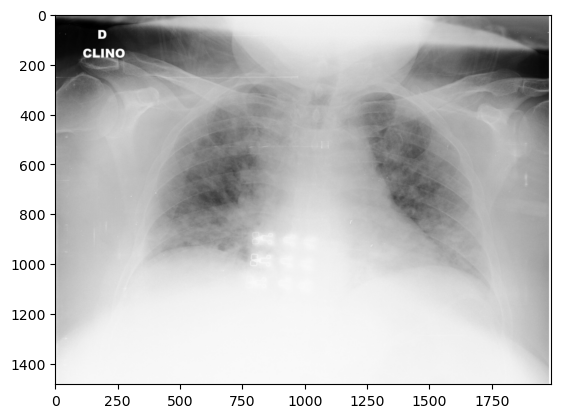

In [2]:
img1 = cv2.imread('images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg') #giver your path image folder
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img1))
print(img1.shape)
plt.imshow(img1)

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR.
Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. 
This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array. For grayscale images, it looks similar, but for color images, it changes appearance.

<class 'numpy.ndarray'>
(1148, 2563, 3)


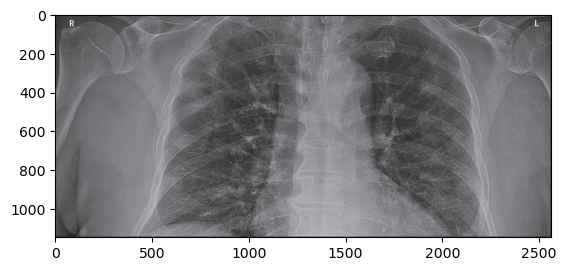

In [3]:
img1 = cv2.imread('images/1-s2.0-S0140673620303706-fx1_lrg.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img1))
print(img1.shape)
plt.imshow(img1)

<class 'numpy.ndarray'>
(391, 439, 3)


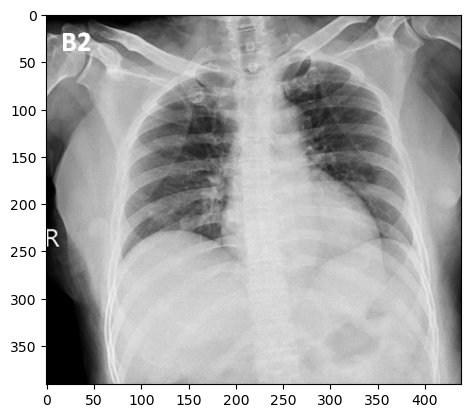

In [4]:
img1 = cv2.imread('images/1-s2.0-S1684118220300682-main.pdf-003-b2.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img1))
print(img1.shape)
plt.imshow(img1)

In [5]:
#checking total images
len(os.listdir('images/'))

7161

<class 'numpy.ndarray'>
(391, 439, 4)


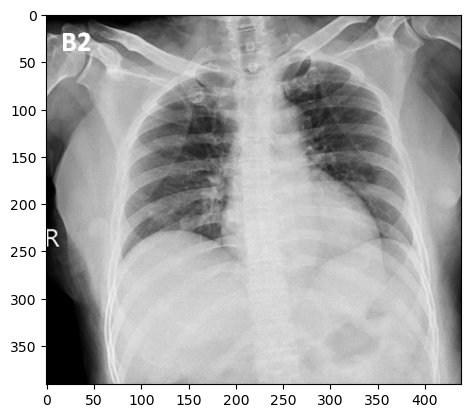

In [6]:
img1 = skimage.io.imread('images/1-s2.0-S1684118220300682-main.pdf-003-b2.png')
print(type(img1))
print(img1.shape)
plt.imshow(img1)

skimages keep the alpha channel as the fourth channel

# Dimensions of these images

Image shapes are not of same dimensions. Most of them have a fourth channel corresponds to alpha channel 
https://stackoverflow.com/questions/58212179/the-difference-between-opencv-and-skimage-while-reading-png-files

skimages keep the alpha channel dimenions. CV2 discards them. 

We can resize the images while performing data augmenation in the pytorch.



In [7]:
dim1 = []
dim2 = []
dim3 = []
for i, image_filename in enumerate(os.listdir('images/')):
    if i % 1000 ==0:
        print(i)
    
    img = cv2.imread('images/'+image_filename)
    #print(image_filename, img.shape)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    dim3.append(colors)

0
1000
2000
3000
4000
5000
6000
7000


<AxesSubplot: >

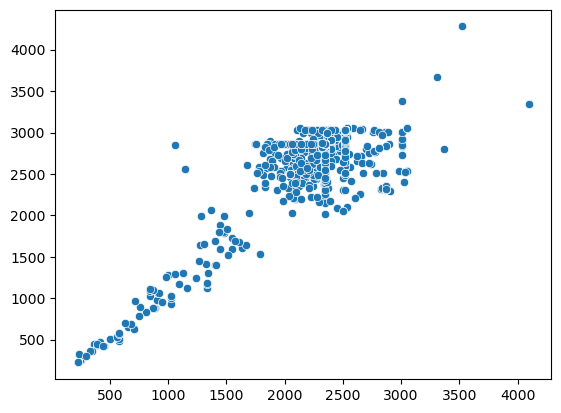

In [8]:
sns.scatterplot(x = dim1, y = dim2)

In [9]:
print(np.mean(dim1))
print(np.mean(dim2))

1666.0696830051668
1987.3224409998604


In [10]:
print(set(dim3))

{3}


In [11]:
img1 = cv2.imread('images/1-s2.0-S0140673620303706-fx1_lrg.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img1))
print(img1.shape)
#plt.imshow(img1)
#print(img1)

<class 'numpy.ndarray'>
(1148, 2563, 3)


In [12]:
img2 = cv2.imread('images/1-s2.0-S0140673620303706-fx1_lrg.jpg')
#img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img2))
print(img2.shape)
#plt.imshow(img2)
#print(img2)

<class 'numpy.ndarray'>
(1148, 2563, 3)


In [13]:
img4 = skimage.io.imread('images/1-s2.0-S0140673620303706-fx1_lrg.jpg')
print(type(img4))
print(img4.shape)

<class 'numpy.ndarray'>
(1148, 2563, 3)


<class 'numpy.ndarray'>
(1148, 2563, 3)


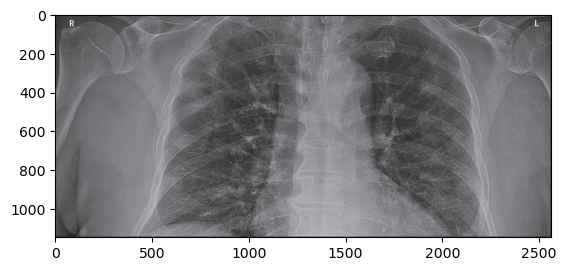

In [14]:
img1 = cv2.imread('images/1-s2.0-S0140673620303706-fx1_lrg.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img1))
print(img1.shape)
plt.imshow(img1)
#print(img1)

In [15]:
#testing resizing and saving

if not os.path.exists('TestSave'):
    os.makedirs('TestSave')


for i, image_filename in enumerate(os.listdir('images/')):
    if i  == 10:
        break
    
    skimage_read = skimage.io.imread('images/'+image_filename)
    print(image_filename, skimage_read.shape)
    
    img = cv2.imread('images/'+image_filename)
    print(image_filename, img.shape)
    img =cv2.resize(img,(100,300))
    cv2.imwrite('TestSave/'+image_filename,img)


01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg (1482, 1989, 3)
01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg (1482, 1989, 3)
03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg (1632, 1610, 3)
03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg (1632, 1610, 3)
1-s2.0-S0140673620303706-fx1_lrg.jpg (1148, 2563, 3)
1-s2.0-S0140673620303706-fx1_lrg.jpg (1148, 2563, 3)
1-s2.0-S1684118220300608-main.pdf-001.jpg (411, 477, 3)
1-s2.0-S1684118220300608-main.pdf-001.jpg (411, 477, 3)
1-s2.0-S1684118220300608-main.pdf-002.jpg (500, 508, 3)
1-s2.0-S1684118220300608-main.pdf-002.jpg (500, 508, 3)
1-s2.0-S1684118220300682-main.pdf-002-a1.png (362, 439, 4)
1-s2.0-S1684118220300682-main.pdf-002-a1.png (362, 439, 3)
1-s2.0-S1684118220300682-main.pdf-002-a2.png (362, 445, 4)
1-s2.0-S1684118220300682-main.pdf-002-a2.png (362, 445, 3)
1-s2.0-S1684118220300682-main.pdf-003-b1.png (391, 436, 4)
1-s2.0-S1684118220300682-main.pdf-003-b1.png (391, 436, 3)
1-s2.0-S1684118220300682-main.pdf-003-b2.png (391, 439, 4)
1-s2.0-S1684118220300682-

In [16]:
for i, image_filename in enumerate(os.listdir('TestSave/')):
    img = cv2.imread('TestSave/'+image_filename)
    print(image_filename, img.shape)

01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg (300, 100, 3)
03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg (300, 100, 3)
1-s2.0-S0140673620303706-fx1_lrg.jpg (300, 100, 3)
1-s2.0-S1684118220300608-main.pdf-001.jpg (300, 100, 3)
1-s2.0-S1684118220300608-main.pdf-002.jpg (300, 100, 3)
1-s2.0-S1684118220300682-main.pdf-002-a1.png (300, 100, 3)
1-s2.0-S1684118220300682-main.pdf-002-a2.png (300, 100, 3)
1-s2.0-S1684118220300682-main.pdf-003-b1.png (300, 100, 3)
1-s2.0-S1684118220300682-main.pdf-003-b2.png (300, 100, 3)
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png (300, 100, 3)


# Saving resized images (224 x 224) 

In [17]:
if not os.path.exists('processed_images'):
    os.makedirs('processed_images')


for i, image_filename in enumerate(os.listdir('images/')):
    img = cv2.imread('images/'+image_filename)
    img =cv2.resize(img,(224,224))
    cv2.imwrite('processed_images/'+image_filename,img)

# Data Augumentation

Normalization of Images in Pytorch
https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/

For normalize we can either calculated mean and std of the image. We can also use the mean and std of the ImageNet dataset if the image is similar to ImageNet images. The mean and std of ImageNet are: mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. If the image is not similar to ImageNet, like medical images, then it is always advised to calculate the mean and std of the dataset and use them to normalize the images.

transforms.ToTensor() : Converts a PIL Image or numpy.ndarray (HxWxC) in the range [0, 255] to a torch.FloatTensor of shape (CxHxW) in the range [0.0, 1.0]

transforms.Resize(size): If size is a sequence like (h, w), the output size will be matched to this. If size is an integer, the smaller edge of the image will be matched to this number. i.e, if height > width, then the image will be rescaled to (size * height / width, size)

transforms.RandomAdjustSharpness: Adjust the sharpness of the image randomly with a given probability, sharpness_factor (float) – How much to adjust the sharpness. Can be any non negative number. 0 gives a blurred image, 1 gives the original image while 2 increases the sharpness by a factor of 2

In [18]:
data_transform = transforms.Compose([
        transforms.RandomRotation(30),      # rotate +/- 30 degrees
        transforms.RandomHorizontalFlip(),  # rHorizontally flip the given image randomly with a given probability (default p=0.5)
        #transforms.RandomVerticalFlip() #Vertically flip the given image randomly with a given probability (default p=0.5), not recommended for medical images
        transforms.Resize((224, 224)),       #  be sure to pass in a list or a tuple
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.RandomAdjustSharpness(1.5, p=0.5), #
        transforms.RandomAdjustSharpness(0.5, p=0.5),
        transforms.RandomAutocontrast(p=0.5),
        transforms.RandomEqualize(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])